# Applying the ResNet V2 50 model on oversampled dataset and the augmented dataset using ImageDataGenerator.

Programmer: Priyanjani Chandra

Purpose: Implementation of ResNet V2 50.

In [1]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Original dataset paths
old_train_dir = "D:\\NN_Project\\New_folder\\New\\new_train\\"
old_valid_dir = "D:\\NN_Project\\New_folder\\New\\new_valid\\"

# Oversampled dataset paths
new_train_dir = "D:\\NN_Project\\New_folder\\new_train2\\"
new_valid_dir = "D:\\NN_Project\\New_folder\\new_valid2\\"

# ResNet V2 50 Model

In [3]:
batch_size = 32                               # number of samples that will be generated throw the network is set to 32
epochs = 5                                   # we iterate through 5 times by setting the value of epoch to 5
IMG_HEIGHT = 224                              # images height set to 224
IMG_WIDTH = 224                               # image width is set to 224

## On oversampled dataset

In [4]:
train_img_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_img_gen.flow_from_directory(directory=new_train_dir, 
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                   batch_size=batch_size, 
                                                   class_mode='categorical', shuffle=True)


Found 6496 images belonging to 5 classes.


In [5]:
val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(directory=new_valid_dir, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')


Found 1626 images belonging to 5 classes.


In [6]:

# Model Creation
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4", 
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
])

conv_feature_extractor.trainable = False

In [7]:
resnet_v2_50 = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(5, activation='softmax')
                      ])

# printing the summary of the model
resnet_v2_50.summary()                                                           


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1001)              25615849  
_________________________________________________________________
dense (Dense)                (None, 5)                 5010      
Total params: 25,620,859
Trainable params: 5,010
Non-trainable params: 25,615,849
_________________________________________________________________


In [8]:
resnet_v2_50.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
history = resnet_v2_50.fit_generator(train_data_gen,
                                   epochs=epochs,
                                   validation_data= val_data_gen)

Epoch 1/5
203/203 [==============================] - 1918s 9s/step - loss: 1.2218 - accuracy: 0.5300 - val_loss: 1.0252 - val_accuracy: 0.5898
Epoch 2/5
203/203 [==============================] - 1934s 10s/step - loss: 0.9434 - accuracy: 0.6184 - val_loss: 0.9534 - val_accuracy: 0.6009
Epoch 3/5
203/203 [==============================] - 1993s 10s/step - loss: 0.8748 - accuracy: 0.6473 - val_loss: 0.9346 - val_accuracy: 0.6138
Epoch 4/5
203/203 [==============================] - 1879s 9s/step - loss: 0.8517 - accuracy: 0.6621 - val_loss: 0.8947 - val_accuracy: 0.6298
Epoch 5/5
203/203 [==============================] - 1859s 9s/step - loss: 0.8301 - accuracy: 0.6698 - val_loss: 0.9121 - val_accuracy: 0.6402


### Plotting Accuracy and Validation curve for the oversampled dataset

In [15]:
# Plotting Resulting Accuracy and Loss
import matplotlib.pyplot as plt
def acc_loss_plot(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

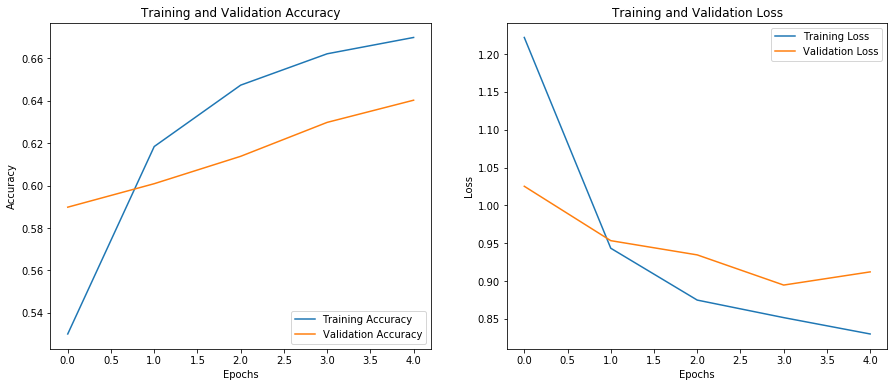

In [16]:
acc_loss_plot(history, epochs)

## Applying model on augmented dataset using ImageDataGenerator 

In [17]:
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45, 
                                   width_shift_range=.15, 
                                   height_shift_range=.15, 
                                   horizontal_flip=True, 
                                   zoom_range=0.5)

train_data_gen = train_img_gen.flow_from_directory(old_train_dir, 
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                   batch_size=batch_size, 
                                                   class_mode='categorical', shuffle=True)


Found 2632 images belonging to 5 classes.


In [18]:
val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(old_valid_dir, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')

Found 466 images belonging to 5 classes.


In [19]:
# Model Creation
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4", 
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
])

conv_feature_extractor.trainable = False

In [20]:
resnet_v2_50_old = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(5, activation='softmax')
                      ])

resnet_v2_50_old.summary()  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 1001)              25615849  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5010      
Total params: 25,620,859
Trainable params: 5,010
Non-trainable params: 25,615,849
_________________________________________________________________


In [21]:
resnet_v2_50_old.compile(optimizer='adam',                                            # Model Compilation and Fitting
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

In [24]:
history_old = resnet_v2_50_old.fit_generator(train_data_gen,
                                   epochs=10,
                                   validation_data= val_data_gen)

Epoch 1/10
83/83 [==============================] - 735s 9s/step - loss: 0.7567 - accuracy: 0.7223 - val_loss: 0.9079 - val_accuracy: 0.6567
Epoch 2/10
83/83 [==============================] - 828s 10s/step - loss: 0.7461 - accuracy: 0.7185 - val_loss: 0.8028 - val_accuracy: 0.6717
Epoch 3/10
83/83 [==============================] - 754s 9s/step - loss: 0.7373 - accuracy: 0.7348 - val_loss: 0.7684 - val_accuracy: 0.7124
Epoch 4/10
83/83 [==============================] - 748s 9s/step - loss: 0.7327 - accuracy: 0.7238 - val_loss: 0.9046 - val_accuracy: 0.6867
Epoch 5/10
83/83 [==============================] - 747s 9s/step - loss: 0.7063 - accuracy: 0.7413 - val_loss: 0.7786 - val_accuracy: 0.7167
Epoch 6/10
83/83 [==============================] - 790s 10s/step - loss: 0.6998 - accuracy: 0.7314 - val_loss: 0.9072 - val_accuracy: 0.6953
Epoch 7/10
83/83 [==============================] - 756s 9s/step - loss: 0.7008 - accuracy: 0.7447 - val_loss: 0.8890 - val_accuracy: 0.6760
Epoch 8/10


### Plotting Accuracy and Validation curve for the oversampled dataset

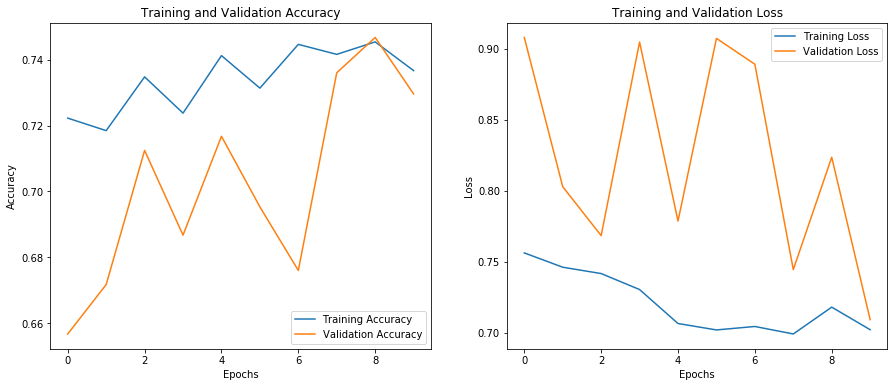

In [27]:
acc_loss_plot(history_old, 10)